In [ ]:

# First Section: Importing Libraries
import os
import requests
from bs4 import BeautifulSoup

# Second Section: Declare important variables
google_image = "https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&"

user_agent = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}

saved_folder = 'Dataset_test'

def main():
    if not os.path.exists(saved_folder):
        os.mkdir(saved_folder)
    download_images()

def download_images():
    data = input('SEARCH: ')
    n_images = int(input('SEARCH SIZE: '))

    search_url = google_image + 'q=' + data
    response = requests.get(search_url, headers=user_agent)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    results = soup.findAll('img', {'class': 'rg_i Q4LuWd'})

    count = 1
    links = []
    for result in results:
        try:
            link = result['data-src']
            links.append(link)
            count += 1
            if(count > n_images):
                break
        except KeyError:
            continue

    print(f"Downloading {len(links)} images...")
    for i, link in enumerate(links):
        response = requests.get(link)
        image_name = saved_folder + '/' + data + str(i+81) + '.jpg'
        with open(image_name, 'wb') as fh:
            fh.write(response.content)

if __name__ == "__main__":
    main()

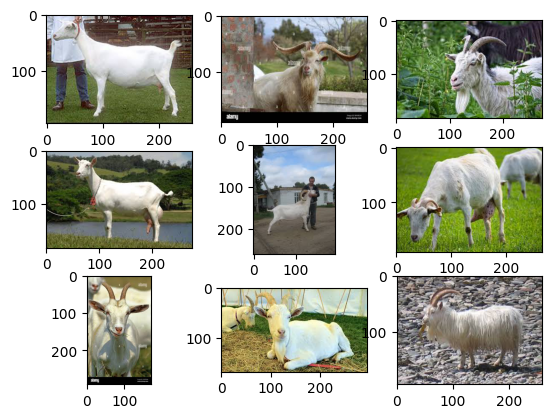

In [6]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'drive/MyDrive/Assignment_5_ml/Dataset_test/'
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # define filename
 filename = folder + 'Saanen Goat' + str(i+1) + '.jpg'
 # load image pixels
 image = imread(filename)
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

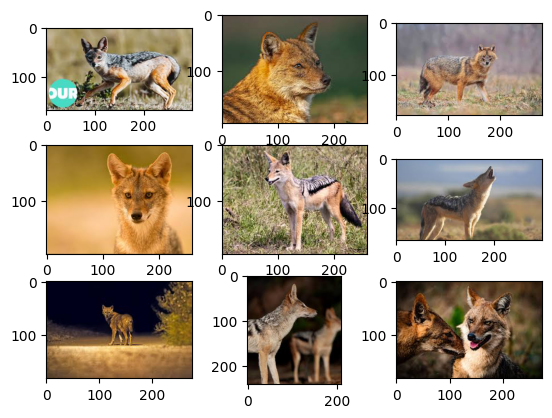

In [7]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'drive/MyDrive/Assignment_5_ml/Dataset_test/'
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # define filename
 filename = folder + 'Jackal' + str(i+1) + '.jpg'
 # load image pixels
 image = imread(filename)
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

In [8]:
!pip install -q keras
import tensorflow as tf

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
import numpy
# from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
# from keras.preprocessing.image import img_to_array
# define location of dataset
folder = 'drive/MyDrive/Assignment_5_ml/Dataset_test/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    output = 0.0
    if file.startswith('Jackal'):
      output = 1.0
    # load image
    photo = load_img(folder + file, target_size=(200, 200))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
    # convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('Jackal_vs_Saanen_Goat_photos.npy', photos)
save('Jackal_vs_Saanen_Goat_labels.npy', labels)
print(photos)

In [58]:
print(photos.shape)
photo = photos.reshape((8000000,3))
print(photo)
m = numpy.mean(photo,axis = 0)
print(m)

(200, 200, 200, 3)
[[115. 123. 142.]
 [122. 133. 153.]
 [127. 139. 161.]
 ...
 [143. 128.  61.]
 [146. 135.  73.]
 [172. 165. 113.]]
[142.7965  134.19688 114.47238]


In [33]:
APP_FOLDER = '/content/drive/MyDrive/Assignment_5_ml/dataset_1'
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(APP_FOLDER):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

Searching in :  /content/drive/MyDrive/Assignment_5_ml/dataset_1
Searching in :  /content/drive/MyDrive/Assignment_5_ml/dataset_1/train
Searching in :  /content/drive/MyDrive/Assignment_5_ml/dataset_1/train/Jackal
Searching in :  /content/drive/MyDrive/Assignment_5_ml/dataset_1/train/Saanen Goat
Searching in :  /content/drive/MyDrive/Assignment_5_ml/dataset_1/test
Searching in :  /content/drive/MyDrive/Assignment_5_ml/dataset_1/test/Jackal
Searching in :  /content/drive/MyDrive/Assignment_5_ml/dataset_1/test/Saanen Goat
Total number of files 200
Total Number of directories 6
Total: 206


In [32]:
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = '/content/drive/MyDrive/Assignment_5_ml/dataset_1/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
 # create label subdirectories
 labeldirs = ['Jackal/', 'Saanen Goat/']
 for labldir in labeldirs:
   newdir = dataset_home + subdir + labldir
   makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2
# copy training dataset images into subdirectories
count1 = 0;
count2 = 0;
src_directory = 'drive/MyDrive/Assignment_5_ml/Dataset_test/'
for file in listdir(src_directory):
 src = src_directory + '/' + file
 dst_dir = 'train/'
 if random() < val_ratio:
   dst_dir = 'test/'
 if file.startswith('Saanen Goat'):
   dst = dataset_home + dst_dir + 'Saanen Goat/'  + file
   count1+=1
   copyfile(src, dst)
 elif file.startswith('Jackal'):
   dst = dataset_home + dst_dir + 'Jackal/'  + file
   count2+=1
   copyfile(src, dst)


print(count1,count2)

100 100


vgg1 85.000



In [66]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import time

vgg1_performance = {"Training_loss" : None, "Training_time" : None, "Testing_Accuracy" : None, "Training_Accuracy": None,"Parameters": None}

# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 opt = SGD(lr=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 num_params = model.count_params()
 vgg1_performance["Parameters"] = num_params
 return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 vgg1_performance["Training_loss"] = history.history['loss'][-1]

 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 vgg1_performance["Training_Accuracy"] = history.history['accuracy'][-1]
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 vgg1_performance["Testing_Accuracy"] = history.history['val_accuracy'][-1]
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 pyplot.savefig(filename + '_plot.png')
 pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
 # define model
 model = define_model()
 # create data generator
 datagen = ImageDataGenerator(rescale=1.0/255.0)
 # prepare iterators
 train_it = datagen.flow_from_directory('/content/drive/MyDrive/Assignment_5_ml/dataset_1/train/',
 class_mode='binary', batch_size=64, target_size=(200, 200))
 test_it = datagen.flow_from_directory('/content/drive/MyDrive/Assignment_5_ml/dataset_1/test/',
 class_mode='binary', batch_size=64, target_size=(200, 200))
 # fit model
 start = time.time()
 history = model.fit(train_it, steps_per_epoch=len(train_it),
 validation_data=test_it, validation_steps=len(test_it), epochs=15, verbose=0)
 # evaluate model
 end = time.time()
 vgg1_performance["Training_time"] = end - start
 _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)

 
# entry point, run the test harness
run_test_harness()

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


> 77.500


In [67]:
vgg1_performance

{'Training_loss': 0.27809542417526245,
 'Training_time': 15.266689777374268,
 'Testing_Accuracy': 0.7749999761581421,
 'Training_Accuracy': 0.8999999761581421,
 'Parameters': 40961153}

vgg 3 72.500 AT 15EPOCHS
VGG3 82.500 AT 30 EPOCHS
VGG3 82.500 AT 50 EPOCHS


In [68]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model

vgg3_performance = {"Training_loss" : None, "Training_time" : None, "Testing_Accuracy" : None, "Training_Accuracy": None,"Parameters": None}


# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 opt = SGD(lr=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 num_params = model.count_params()
 vgg3_performance["Parameters"] = num_params
 return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 vgg3_performance["Training_loss"] = history.history['loss'][-1]
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 vgg3_performance["Training_Accuracy"] = history.history['accuracy'][-1]
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 vgg3_performance["Testing_Accuracy"] = history.history['val_accuracy'][-1]

 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 pyplot.savefig(filename + '_plot.png')
 pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
 # define model
 model = define_model()
 # create data generator
 datagen = ImageDataGenerator(rescale=1.0/255.0)
 # prepare iterators
 train_it = datagen.flow_from_directory('/content/drive/MyDrive/Assignment_5_ml/dataset_1/train/',
 class_mode='binary', batch_size=64, target_size=(200, 200))
 test_it = datagen.flow_from_directory('/content/drive/MyDrive/Assignment_5_ml/dataset_1/test/',
 class_mode='binary', batch_size=64, target_size=(200, 200))
 start = time.time()
 # fit model
 history = model.fit(train_it, steps_per_epoch=len(train_it),
 validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
 # evaluate model
 end = time.time()
 vgg3_performance["Training_time"] = end - start

 _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


> 85.000


In [69]:
vgg3_performance

{'Training_loss': 0.07663717120885849,
 'Training_time': 60.138978004455566,
 'Testing_Accuracy': 0.8500000238418579,
 'Training_Accuracy': 0.987500011920929,
 'Parameters': 10333505}

vgg 3 d 72.500

In [70]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
vgg3d_performance = {"Training_loss" : None, "Training_time" : None, "Testing_Accuracy" : None, "Training_Accuracy": None,"Parameters": None}


# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 opt = SGD(lr=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 num_params = model.count_params()
 vgg3d_performance["Parameters"] = num_params
 return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 vgg3d_performance["Training_loss"] = history.history['loss'][-1]
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 vgg3d_performance["Training_Accuracy"] = history.history['accuracy'][-1]
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 vgg3d_performance["Testing_Accuracy"] = history.history['val_accuracy'][-1]
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 pyplot.savefig(filename + '_plot.png')
 pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
 # define model
 model = define_model()
 # create data generator
 train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 test_datagen = ImageDataGenerator(rescale=1.0/255.0)
 # prepare iterators
 train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/Assignment_5_ml/dataset_1/train/',
 class_mode='binary', batch_size=64, target_size=(200, 200))
 test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/Assignment_5_ml/dataset_1/test/',
 class_mode='binary', batch_size=64, target_size=(200, 200))
 # fit model
 start = time.time()
 history = model.fit(train_it, steps_per_epoch=len(train_it),
 validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
 # evaluate model
 end = time.time()
 vgg3d_performance["Training_time"] = end - start

 _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


> 72.500


VGG 16 95.000 at 15 epochs




In [ ]:
vgg3d_performance

In [74]:

# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

vgg16_performance = {"Training_loss" : None, "Training_time" : None, "Testing_Accuracy" : None, "Training_Accuracy": None,"Parameters": None}

 
# define cnn model
def define_model():
 # load model
 model = VGG16(include_top=False, input_shape=(224, 224, 3))
 # mark loaded layers as not trainable
 for layer in model.layers:
   layer.trainable = False
 # add new classifier layers
 flat1 = Flatten()(model.layers[-1].output)
 class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
 output = Dense(1, activation='sigmoid')(class1)
 # define new model
 model = Model(inputs=model.inputs, outputs=output)
 # compile model
 opt = SGD(lr=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 num_params = model.count_params()
 vgg16_performance["Parameters"] = num_params
 return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 vgg16_performance["Training_loss"] = history.history['loss'][-1]
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 vgg16_performance["Training_Accuracy"] = history.history['accuracy'][-1]
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 vgg16_performance["Testing_Accuracy"] = history.history['val_accuracy'][-1]
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 pyplot.savefig(filename + '_plot.png')
 pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
 # define model
 model = define_model()
 # create data generator
 datagen = ImageDataGenerator(featurewise_center=True)
 # specify imagenet mean values for centering
 datagen.mean = [142.7965,134.19688,114.47238] # mean for our dataset
 # prepare iterator
 train_it = datagen.flow_from_directory('/content/drive/MyDrive/Assignment_5_ml/dataset_1/train/',
 class_mode='binary', batch_size=64, target_size=(224, 224))
 test_it = datagen.flow_from_directory('/content/drive/MyDrive/Assignment_5_ml/dataset_1/test/',
 class_mode='binary', batch_size=64, target_size=(224, 224))
 # fit model
 start = time.time()
 history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
 validation_data=test_it, validation_steps=len(test_it), epochs=25, verbose=1)
 # evaluate model
 end = time.time()
 vgg3d_performance["Training_time"] = end - start
 _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


<ipython-input-74-453d66b077da>:70: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


Epoch 1/25
3/3 [==============================] - 3s 764ms/step - loss: 6.9574 - accuracy: 0.7312 - val_loss: 3.3745 - val_accuracy: 0.8250
Epoch 2/25
3/3 [==============================] - 1s 391ms/step - loss: 2.6629 - accuracy: 0.9250 - val_loss: 1.9335 - val_accuracy: 0.9000
Epoch 3/25
3/3 [==============================] - 1s 451ms/step - loss: 0.2622 - accuracy: 0.9812 - val_loss: 5.8240 - val_accuracy: 0.8500
Epoch 4/25
3/3 [==============================] - 2s 549ms/step - loss: 0.1425 - accuracy: 0.9812 - val_loss: 5.5975 - val_accuracy: 0.8500
Epoch 5/25
3/3 [==============================] - 1s 444ms/step - loss: 1.5589e-10 - accuracy: 1.0000 - val_loss: 5.5982 - val_accuracy: 0.8750
Epoch 6/25
3/3 [==============================] - 1s 548ms/step - loss: 4.1042e-14 - accuracy: 1.0000 - val_loss: 5.6762 - val_accuracy: 0.9000
Epoch 7/25
3/3 [==============================] - 2s 561ms/step - loss: 1.4478e-15 - accuracy: 1.0000 - val_loss: 5.7605 - val_accuracy: 0.9000
Epoch 8/

<ipython-input-74-453d66b077da>:75: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


> 90.000


In [72]:
vgg16_performance

{'Training_loss': 1.9075678210356273e-06,
 'Training_time': None,
 'Testing_Accuracy': 0.8999999761581421,
 'Training_Accuracy': 1.0,
 'Parameters': 17926209}

mlp 72.500 at 10 epochs

In [81]:
#MLP
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
mlp_performance = {"Training_loss" : None, "Training_time" : None, "Testing_Accuracy" : None, "Training_Accuracy": None,"Parameters": None}


# define cnn model
def define_model():
 model = Sequential()
 model.add(Flatten(input_shape=(200, 200, 3)))
 model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
 model.add(Dense(4096, activation='relu',kernel_initializer='he_uniform'))
 model.add(Dense(512, activation='relu',kernel_initializer='he_uniform'))
 model.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 opt = SGD(lr=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 num_params = model.count_params()
 mlp_performance["Parameters"] = num_params
 return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'], color='blue', label='train')
 pyplot.plot(history.history['val_loss'], color='orange', label='test')
 mlp_performance["Training_loss"] = history.history['loss'][-1]
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'], color='blue', label='train')
 mlp_performance["Training_Accuracy"] = history.history['accuracy'][-1]
 pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 mlp_performance["Testing_Accuracy"] = history.history['val_accuracy'][-1]
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 pyplot.savefig(filename + '_plot.png')
 pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
 # define model
 model = define_model()
 # create data generator
 train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 test_datagen = ImageDataGenerator(rescale=1.0/255.0)
 # prepare iterators
 train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/Assignment_5_ml/dataset_1/train/',
 class_mode='binary', batch_size=64, target_size=(200, 200))
 test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/Assignment_5_ml/dataset_1/test/',
 class_mode='binary', batch_size=64, target_size=(200, 200))
 # fit model
 start = time.time()
 history = model.fit(train_it, steps_per_epoch=len(train_it),
 validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
 # evaluate model
 end = time.time()
 mlp_performance["Training_time"] = end - start

 _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


> 82.500


In [82]:
mlp_performance

{'Training_loss': 0.3993002474308014,
 'Training_time': 52.76856541633606,
 'Testing_Accuracy': 0.824999988079071,
 'Training_Accuracy': 0.8374999761581421,
 'Parameters': 18150529}